Versión C – Analizando los Salarios en Ciencia de Datos en 2023
Luciano Recalde

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Cargar los datos en un DataFrame de Pandas
df = pd.read_csv('data/ds_salaries.csv')
# Ver las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head(10))
# Ver últimas filas del DataFrame
print("Últimas filas del DataFrame:")
print(df.tail(5))
# Obtener información general sobre el DataFrame
print("Información del DataFrame:")
print(df.info())
# Generar estadísticas descriptivas
print("Estadísticas descriptivas del DataFrame:")
print(df.describe())
# Inspeccionar los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(df.dtypes)
df.nunique()
print(df.nunique())

Primeras filas del DataFrame:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   
5       2023               SE              FT         Applied Scientist   
6       2023               SE              FT         Applied Scientist   
7       2023               SE              FT            Data Scientist   
8       2023               SE              FT            Data Scientist   
9       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES        

Validacion

In [144]:
# Verificar duplicados
duplicate_rows = df.duplicated()
if duplicate_rows.any():
    print("Hay duplicados en el DataFrame")
else:
    print("No hay duplicados en el DataFrame")
#En este caso aunque haya valores duplicados, cómo no existe un ID unico del empleado en los datos se podría decir que cada dato trata de un empleado disinto
columns = ['work_year','experience_level','employment_type','company_size','remote_ratio','job_title','company_location']


for column in columns: # se imprimen los valores únicos para inspección visual de typos o inconsistencias
    print("Valores únicos en la columna: ", column, "---", df[column].unique())
    
print("Cantidad de valores nulos ",df.isnull().sum().sum()) #se imprime la cantidad de valores null en los datos




Hay duplicados en el DataFrame
Valores únicos en la columna:  work_year --- [2023 2022 2020 2021]
Valores únicos en la columna:  experience_level --- ['SE' 'MI' 'EN' 'EX']
Valores únicos en la columna:  employment_type --- ['FT' 'CT' 'FL' 'PT']
Valores únicos en la columna:  company_size --- ['L' 'S' 'M']
Valores únicos en la columna:  remote_ratio --- [100   0  50]
Valores únicos en la columna:  job_title --- ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manag

EDA

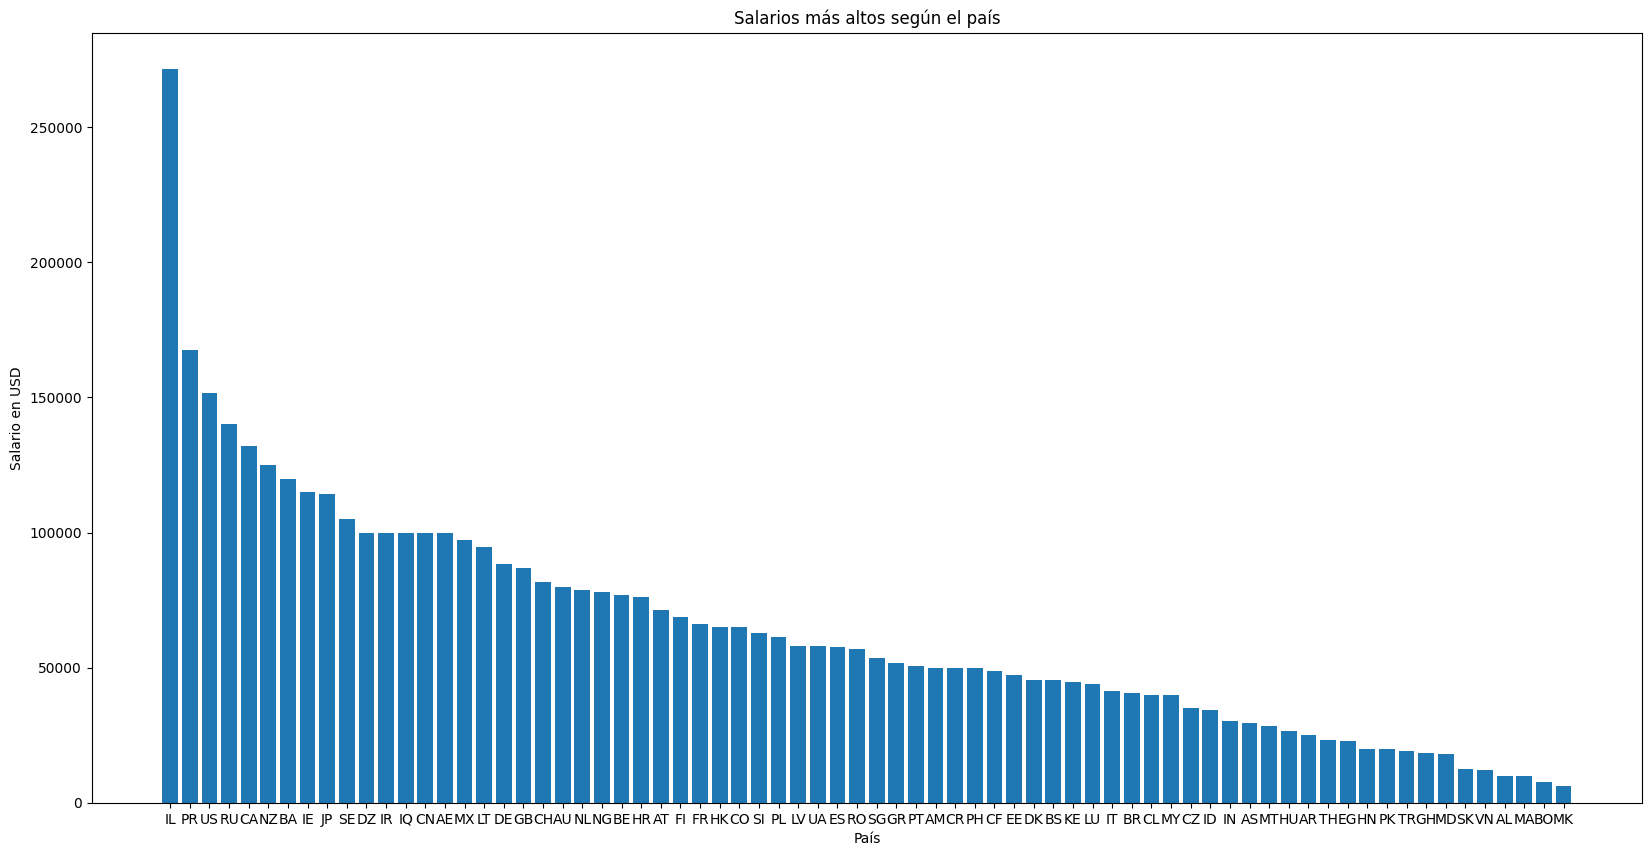

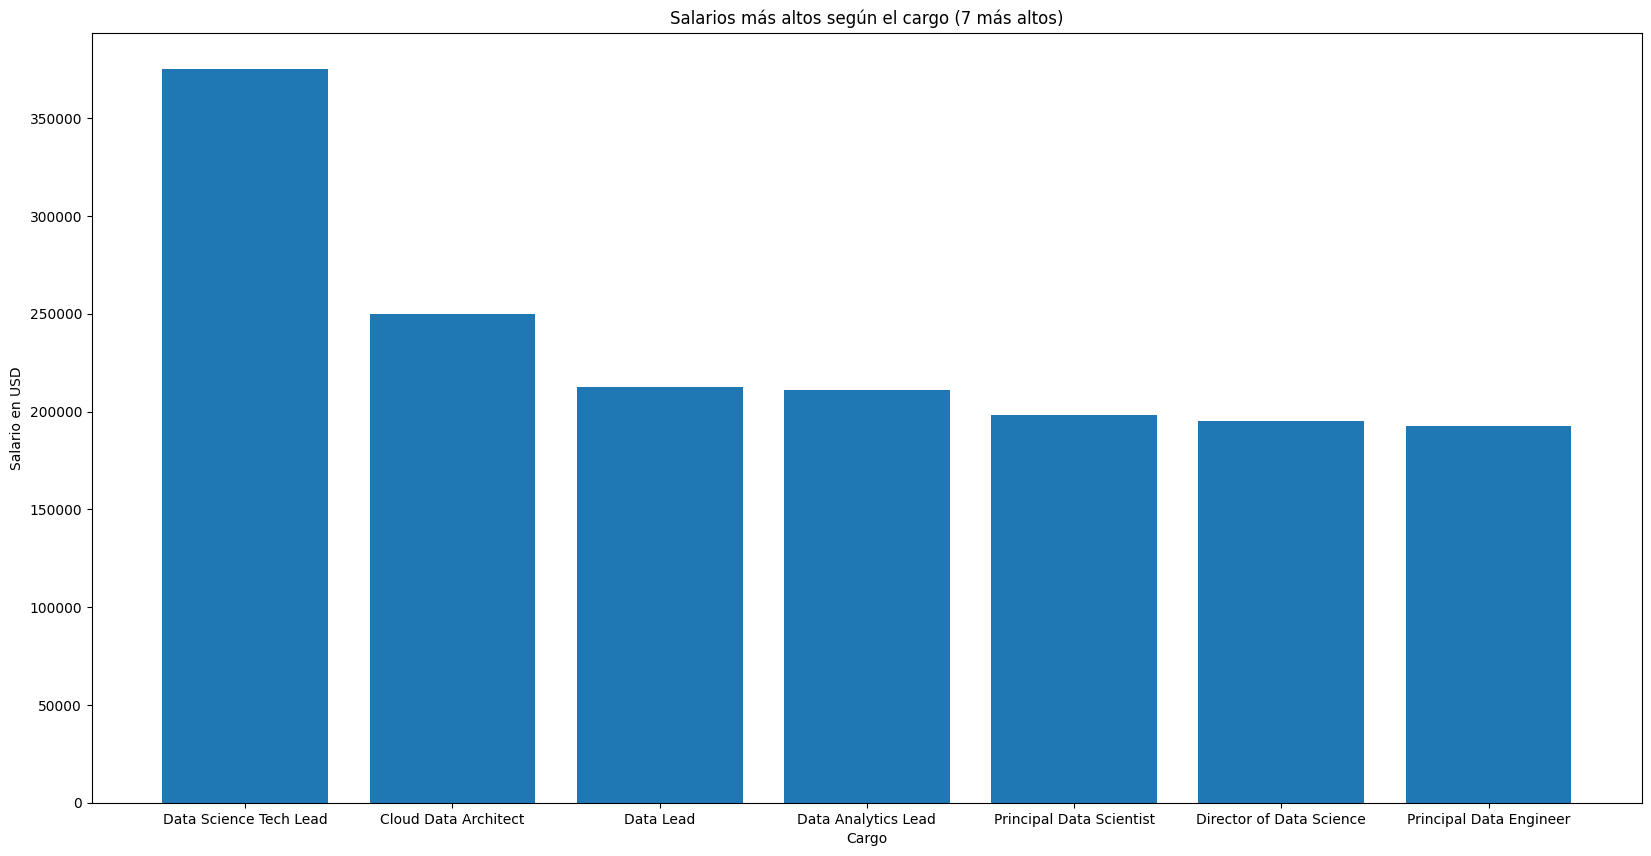

      remote_ratio
0              100
1              100
2              100
3              100
4              100
...            ...
3750           100
3751           100
3752           100
3753           100
3754            50

[3755 rows x 1 columns]
[[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5], [2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8], [1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]]


/tmp/ipykernel_27626/4084681456.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salarios, labels=categorias)


ValueError: X must have 2 or fewer dimensions

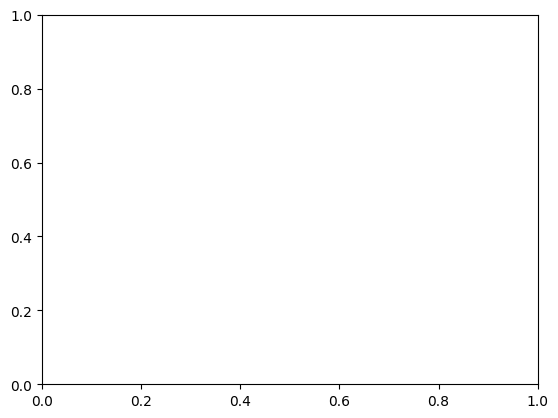

In [145]:
salario_promedio = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.bar(salario_promedio.index, salario_promedio)
plt.xlabel('País')
plt.ylabel('Salario en USD')
plt.title('Salarios más altos según el país')
plt.show()
plt.figure(figsize=(20,10))
salario_promedio = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
mas_altos = salario_promedio.head(7)
plt.bar(mas_altos.index, mas_altos)
plt.xlabel('Cargo')
plt.ylabel('Salario en USD')
plt.title('Salarios más altos según el cargo (7 más altos)')
plt.show()

salario_promedio = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
df1 = df[['remote_ratio']]
df1.query('remote_ratio == 0')
df2 = df[['remote_ratio']]
df2.query('remote_ratio == 50')
df3 = df[['remote_ratio']]
df3.query('remote_ratio == 100')
salarios_remote = df3
salarios_semi_remote = df2
salarios_no_remote = df1
salarios = []

salarios.append(salarios_remote)
salarios.append(salarios_semi_remote)
salarios.append(salarios_no_remote)
datos = [[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5],
         [2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8],
         [1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]]
print(salarios[1])
print(datos)
categorias = ['Remoto', 'Semi Remoto', 'Presencial']
# Crear el boxplot de múltiples series
plt.boxplot(salarios, labels=categorias)
plt.title("Comparación de Múltiples Series con Boxplot")
plt.ylabel("Valores")
plt.show()